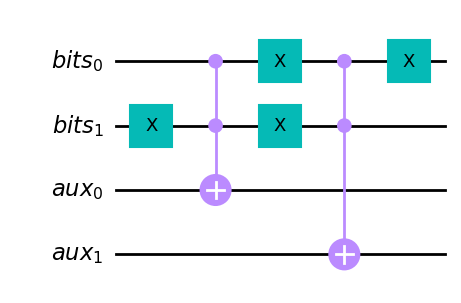

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram

def bit_compare():
    qr = QuantumRegister(2, "bits")
    aux = QuantumRegister(2, "aux")
    
    qc = QuantumCircuit(qr, aux)
    qc.x(qr[1])
    qc.mcx(qr, aux[0])
    qc.x(qr[0])
    qc.x(qr[1])
    qc.mcx(qr, aux[1])
    qc.x(qr[0])
    
    return qc

bit_compare().draw('mpl')

In [2]:
def encode(number):
    qr = QuantumRegister(1, "number")
    qc = QuantumCircuit(qr)
    if (number == 1):
        qc.x(qr[0])
    return qc

In [3]:
def compare(a, b):
    qra = QuantumRegister(1, "a")
    qrb = QuantumRegister(1, "b")
    qraux = QuantumRegister(2, "aux")

    qc = QuantumCircuit(qra, qrb, qraux)

    qc.append(encode(a), [*qra])
    qc.append(encode(b), [*qrb])

    qc.append(bit_compare(), [*qra, *qrb, *qraux])

    # Tell Qiskit how to simulate our circuit
    backend = Aer.get_backend('statevector_simulator') 

    # Do the simulation, returning the result
    result = execute(qc,backend, shots=1000).result()

    # get the probability distribution
    counts = result.get_counts()
    
    return counts

In [4]:
def compare_bitstring(bitstring_a, bitstring_b, exec=True):
    bits = len(bitstring_a)
    qra = QuantumRegister(bits, "a")
    qrb = QuantumRegister(bits, "b")
    qraux = QuantumRegister(2*bits, "aux")
    qrint = QuantumRegister(bits-1, "int")
    cr = ClassicalRegister(2)

    qc = QuantumCircuit(qra, qrb, qraux, qrint, cr)

    for i in range(bits):
        qc.append(encode(bitstring_a[i]), [qra[i]])
        qc.append(encode(bitstring_b[i]), [qrb[i]])
        qc.append(bit_compare(), [qra[i], qrb[i], qraux[2*i], qraux[2*i+1]])
        
        if i < bits-1:
            qc.x(qraux[2*i])
            qc.x(qraux[2*i+1])
            qc.mcx([qraux[2*i], qraux[2*i+1]], qrint[i])
            qc.x(qraux[2*i])
            qc.x(qraux[2*i+1])
        
    for i in range(0, bits-1):
        qc.mcx([qraux[2*(-i-1)],  qrint[-i]], qraux[2*(-i)])
        qc.mcx([qraux[2*(-i-1)+1],  qrint[-i]], qraux[2*(-i)+1])
        
    qc.measure(qraux[0], cr[0])
    qc.measure(qraux[1], cr[1])
    
    if exec:
        # Tell Qiskit how to simulate our circuit
        backend = Aer.get_backend('qasm_simulator') 

        # Do the simulation, returning the result
        result = execute(qc,backend, shots=1000).result()

        # get the probability distribution
        counts = result.get_counts()

        return counts
    else:
        return qc

In [9]:
compare_bitstring('00', '11')

{'00': 1000}

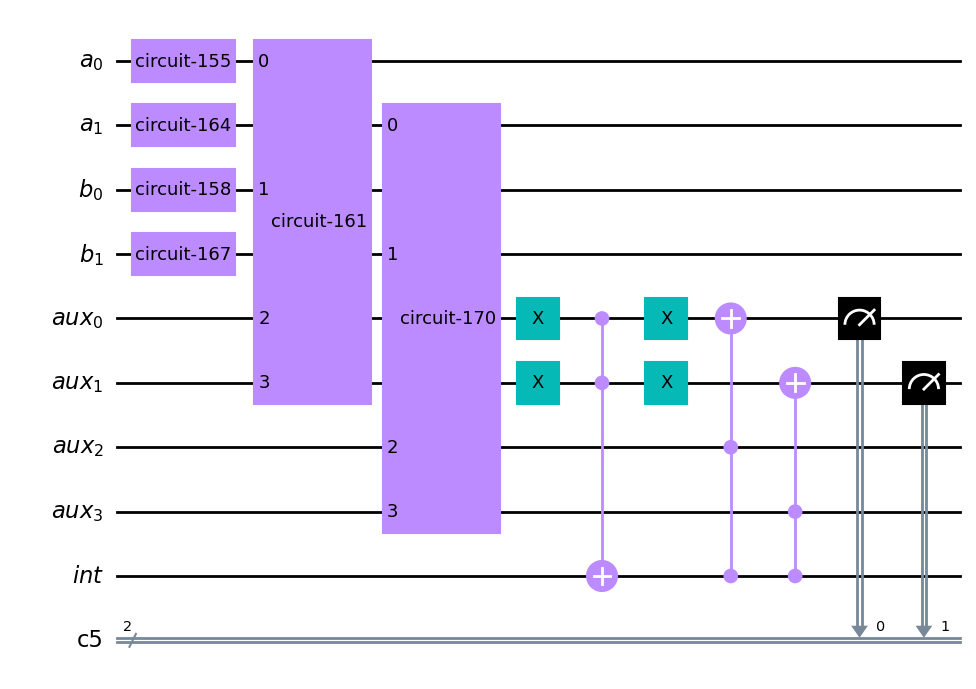

In [10]:
compare_bitstring('00', '11', exec=False).draw('mpl')